In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
print(len(training_set))
print(training_set[0])

2035
[234.05]


In [5]:
print(training_set[:5])


[[234.05]
 [234.55]
 [240.  ]
 [233.3 ]
 [233.55]]


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[:5])

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 [0.61719384]
 [0.61820762]]


In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

#X_train_2dim = X_train
#print(X_train_2dim.shape)

(1975, 60)
(1975,)


In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

2024-11-29 07:31:19.167084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
regressor = Sequential()
regressor.add(Dense(32,activation="relu"))
regressor.add(Dense(16,activation="relu"))
regressor.add(Dense(1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fitting the model to the Training set
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)

regressor.summary()

Epoch 1/5
62/62 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 2/5
62/62 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 3/5
62/62 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 4/5
62/62 [==============================] - 0s 1ms/step - loss: 8.9616e-04
Epoch 5/5
62/62 [==============================] - 0s 1ms/step - loss: 8.7572e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1952      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9

In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price.shape)
print(real_stock_price.T)

(16, 1)
[[220.1  221.1  229.45 230.3  237.7  237.1  229.7  226.25 215.   215.
  215.5  208.   217.   223.5  230.   234.55]]


In [11]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((
    dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - 
                       len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)
print(predicted_stock_price.T)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.T)


(16, 60)
(16, 60, 1)
1/1 [==============================] - 0s 68ms/step
(16, 1)
[[0.15518084 0.23024702 0.21455006 0.22120959 0.26889992 0.30473042
  0.31711695 0.3511366  0.37486866 0.36716828 0.41373506 0.47617733
  0.48383716 0.46840042 0.483789   0.5515595 ]]
[[119.3676  137.87892 134.00806 135.65028 147.41072 156.24652 159.30104
  167.69028 173.5426  171.64369 183.12706 198.52533 200.41425 196.60754
  200.40236 217.11458]]


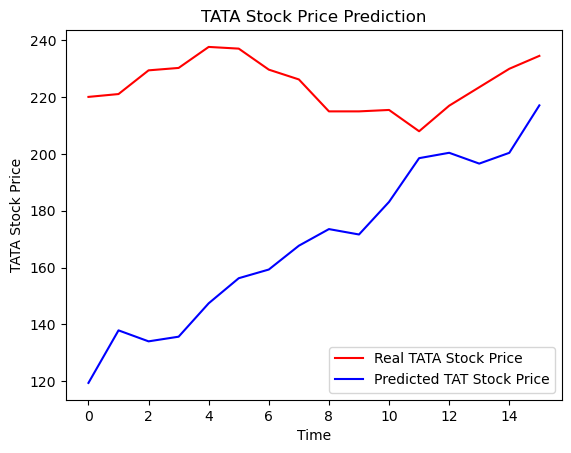

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 
         'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()